In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

import wrangle

### Use the data on student grades from this lesson.

In [35]:
df = wrangle.wrangle_grades()

df

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
...,...,...,...,...
99,70,65,78,77
100,62,70,79,70
101,58,65,70,68
102,57,65,75,65


### Split the data into train, validate, and test datasets.

In [18]:
train_and_validate, test = train_test_split(df, random_state = 123)
train, validate = train_test_split(train_and_validate, random_state = 123)

X_train = train.drop(columns='final_grade')
y_train = train[['final_grade']]

X_validate = validate.drop(columns="final_grade")
y_validate = validate[["final_grade"]]

X_test = test.drop(columns='final_grade')
y_test = test[['final_grade']]

### Create a model that uses exam 1 to predict the final grade.

In [49]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m1 = y_train.copy()

# creating linear regression object
lm_m1 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m1.fit(X_train[['exam1']], y_train_m1)

# creating new column that holds model predictions
y_train_m1['yhat_lm_m1'] = lm_m1.predict(X_train[['exam1']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m1['residual'] = y_train_m1['yhat_lm_m1'] - y_train_m1['final_grade']

# displaying results
y_train_m1.head()

,final_grade,yhat_lm_m1,residual
10,68,66.245821,-1.754179
15,87,86.693733,-0.306267
42,85,85.179072,0.179072
51,72,75.333782,3.333782
46,76,77.605772,1.605772


### Create a model that uses exam 2 to predict the final grade.

In [47]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m2 = y_train.copy()

# creating linear regression object
lm_m2 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m2.fit(X_train[['exam2']], y_train_m2)

# creating new column that holds model predictions
y_train_m2['yhat_lm_m2'] = lm_m2.predict(X_train[['exam2']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m2['residual'] = y_train_m2['yhat_lm_m2'] - y_train_m2['final_grade']

# displaying results
y_train_m2.head()

,final_grade,yhat_lm_m2,residual
10,68,69.406878,1.406878
15,87,87.047586,0.047586
42,85,84.107468,-0.892532
51,72,79.207271,7.207271
46,76,74.307075,-1.692925


### Compare your models in the following manner:

### Calculate the mean squared error

In [27]:
# calculating mean squared error
RMSE_lm_m1 = np.sqrt(mean_squared_error(y_train_m1.final_grade, y_train_m1.yhat_lm_m1))

# printing results
print("linear model 1\n  Root mean squared error: {:.3}".format(RMSE_lm_m1))

# calculating mean squared error
RMSE_lm_m2 = np.sqrt(mean_squared_error(y_train_m2.final_grade, y_train_m2.yhat_lm_m2))

# printing results
print("\nlinear model 2\n  Root mean squared error: {:.3}".format(RMSE_lm_m2))


linear model 1
  Root mean squared error: 1.83

linear model 2
  Root mean squared error: 3.76


### Visualize the residuals. Create a seperate visualization for each model.

Text(0.5, 1.0, 'Model 1 - Predicted vs Actual Final Grade')

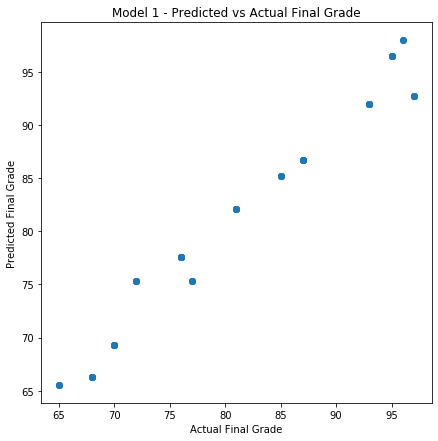

In [42]:
# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 1 predictino, 
plt.scatter(y_train_m1.final_grade, y_train_m1.yhat_lm_m1)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 1 - Predicted vs Actual Final Grade')

Text(0.5, 1.0, 'Model 2 - Predicted vs Actual Final Grade')

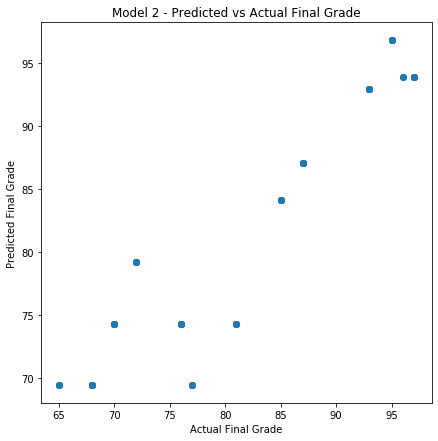

In [44]:
# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 2 prediction, 
plt.scatter(y_train_m2.final_grade, y_train_m2.yhat_lm_m2)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 2 - Predicted vs Actual Final Grade')

### Visualize the actual vs the predicted values. Create a seperate visualization for each model.

Text(0.5, 1.0, 'Model 1 - Predicted vs Actual Final Grade')

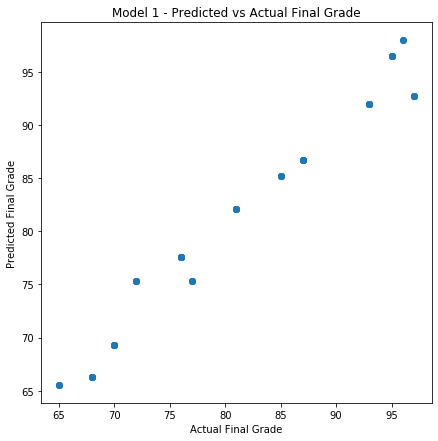

In [45]:
# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 1 predictino, 
plt.scatter(y_train_m1.final_grade, y_train_m1.yhat_lm_m1)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 1 - Predicted vs Actual Final Grade')

Text(0.5, 1.0, 'Model 2 - Predicted vs Actual Final Grade')

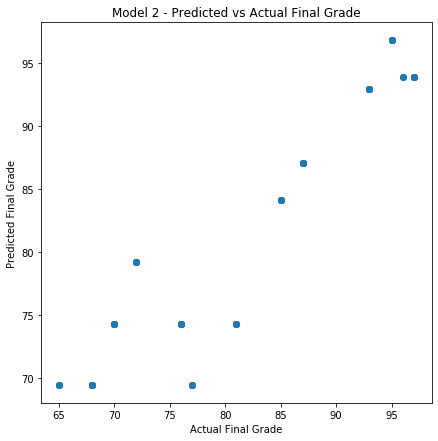

In [46]:
# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 2 prediction, 
plt.scatter(y_train_m2.final_grade, y_train_m2.yhat_lm_m2)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 2 - Predicted vs Actual Final Grade')

### Create a model that uses exam 1 and exam 3 to predict final grade. 

### How does this model compare to your previous ones?

### Take your best preforming model and measure its performance on the validate data set. 

### How does the performance differ between train and validate?

### Make a 4th model with a slight difference like one more/less feature or a single hyperparameter that's different to see if you can beat that the last model's performance on validate.

### Tune your models using validate to improve performance. Select the model w/ the best performance and evaluate that one on test, to get a more clear understanding of how it will perform on out-of-sample data.